In [1]:
import nltk                                  # Python library for NLP
# from nltk.corpus import twitter_samples      # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt              # visualization library
import numpy as np                           # library for scientific computing and matrix operations
import pandas as pd

https://www.kaggle.com/mustfkeskin/turkish-movie-sentiment-analysis-dataset

sitesinden indirdiğim verileri sanki tweet'miş gibi kullanıyorum.

In [12]:
movie_reviews = pd.read_csv("turkish_movie_sentiment_dataset.csv")

In [3]:
all_positive_tweets = list()
all_negative_tweets = list()
for i in range(movie_reviews.shape[0]):
    if(float(movie_reviews['point'][i].replace(',','.')) >= 2.5):
        all_positive_tweets.append(movie_reviews['comment'][i])
    else:
        all_negative_tweets.append(movie_reviews['comment'][i])
all_positive_tweets = all_positive_tweets[0:2000]
all_negative_tweets = all_negative_tweets[0:2000]

In [4]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

# import our convenience functions
from utils import process_tweet, build_freqs

[nltk_data] Downloading package stopwords to /Users/ekrem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

# let's see how many tweets we have
print("Number of tweets: ", len(tweets))

Number of tweets:  4000


In [6]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [7]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 27411


In [9]:
list(freqs.items())[:1000]

[(('jean', 1.0), 5),
 (('reno', 1.0), 3),
 (('den', 1.0), 28),
 (('zate', 1.0), 122),
 (('leon', 1.0), 19),
 (('filmi', 1.0), 763),
 (('gelir', 1.0), 29),
 (('ak', 1.0), 18),
 (('izlemeye', 1.0), 11),
 (('kalmamış', 1.0), 2),
 (('kaldıysa', 1.0), 1),
 (('ee', 1.0), 6),
 (('duruyor', 1.0), 5),
 (('heme', 1.0), 33),
 (('iz', 1.0), 111),
 ((':)', 1.0), 154),
 (('ekş', 1.0), 4),
 (('fala', 1.0), 26),
 (('izlemek', 1.0), 66),
 (('istiyor', 1.0), 51),
 (('p', 1.0), 136),
 (('izlemeyiin', 1.0), 1),
 (('dost', 1.0), 5),
 (('keza', 1.0), 4),
 (('ilk', 1.0), 213),
 (('sahne', 1.0), 349),
 (('hariç', 1.0), 6),
 (('film', 1.0), 3071),
 (('yer', 1.0), 289),
 (('gittikçe', 1.0), 2),
 (('duygusallık', 1.0), 7),
 (('bırakır', 1.0), 4),
 (('..', 1.0), 765),
 (('mathilda', 1.0), 2),
 (('leo', 1.0), 1),
 (('ev', 1.0), 56),
 (('geldik', 1.0), 20),
 (('ağladık', 1.0), 2),
 (('ben', 1.0), 216),
 (('ağlamış', 1.0), 1),
 (('olabilir', 1.0), 57),
 (('tama', 1.0), 16),
 (('değil', 1.0), 282),
 (('ağladı', 1.0),

In [10]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['inanılmaz', 'anlamsız', 'film', 'final', ':)', ':(', '...']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
    
    # initialize positive and negative counts
    pos = 0
    neg = 0
    
    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
        
    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]
        
    # append the word counts to the table
    data.append([word, pos, neg])
    
data

[['inanılmaz', 37, 26],
 ['anlamsız', 6, 27],
 ['film', 3071, 3111],
 ['final', 61, 45],
 [':)', 154, 59],
 [':(', 7, 24],
 ['...', 1016, 901]]

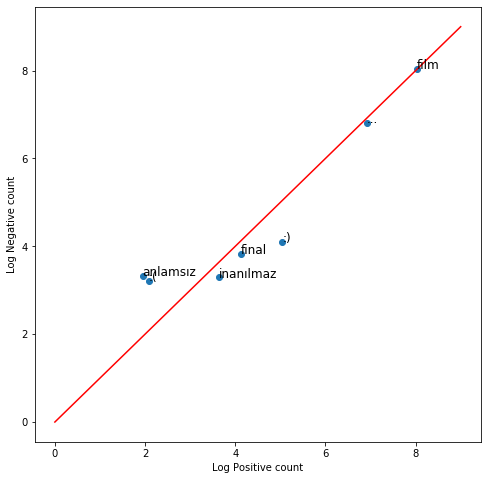

In [11]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()